# 机器学习练习-KNN算法

1．$k$近邻法是基本且简单的分类与回归方法。$k$近邻法的基本做法是：对给定的训练实例点和输入实例点，首先确定输入实例点的$k$个最近邻训练实例点，然后利用这$k$个训练实例点的类的多数来预测输入实例点的类。

2．$k$近邻模型对应于基于训练数据集对特征空间的一个划分。$k$近邻法中，当训练集、距离度量、$k$值及分类决策规则确定后，其结果唯一确定。

3．$k$近邻法三要素：距离度量、$k$值的选择和分类决策规则。常用的距离度量是欧氏距离及更一般的**pL**距离。$k$值小时，$k$近邻模型更复杂；$k$值大时，$k$近邻模型更简单。$k$值的选择反映了对近似误差与估计误差之间的权衡，通常由交叉验证选择最优的$k$。

常用的分类决策规则是多数表决，对应于经验风险最小化。

4．$k$近邻法的实现需要考虑如何快速搜索k个最近邻点。**kd**树是一种便于对k维空间中的数据进行快速检索的数据结构。kd树是二叉树，表示对$k$维空间的一个划分，其每个结点对应于$k$维空间划分中的一个超矩形区域。利用**kd**树可以省去对大部分数据点的搜索， 从而减少搜索的计算量。

## 1.距离度量

在机器学习算法中，我们经常需要计算样本之间的相似度，通常的做法是计算样本之间的距离。

设$x$和$y$为两个向量，求它们之间的距离。

这里用Numpy实现，设和为`ndarray <numpy.ndarray>`，它们的shape都是`(N,)`

$d$为所求的距离，是个浮点数（`float`）。

In [1]:
import numpy as np  #注意：运行代码时候需要导入NumPy库。

### 欧氏距离(Euclidean distance)

欧几里得度量(euclidean metric)(也称欧氏距离)是一个通常采用的距离定义，指在$m$维空间中两个点之间的真实距离，或者向量的自然长度(即该点到原点的距离)。在二维和三维空间中的欧氏距离就是两点之间的实际距离。

距离公式：

$$
d\left( x,y \right) = \sqrt{\sum_{i}^{}(x_{i} - y_{i})^{2}}
$$

![img](images/16333182861.jpg)



代码实现：

In [2]:
def euclidean(x, y):

    return np.sqrt(np.sum((x - y)**2))

### 曼哈顿距离(Manhattan distance)

想象你在城市道路里，要从一个十字路口开车到另外一个十字路口，驾驶距离是两点间的直线距离吗？显然不是，除非你能穿越大楼。实际驾驶距离就是这个“曼哈顿距离”。而这也是曼哈顿距离名称的来源，曼哈顿距离也称为城市街区距离(City Block distance)。

距离公式：

$$
d(x,y) = \sum_{i}^{}|x_{i} - y_{i}|
$$

![](images/638038949250eedd844a38a93a76f66b.png)



代码实现：

In [3]:
def manhattan(x, y):

    return np.sum(np.abs(x - y))

### 切比雪夫距离(Chebyshev distance)

在数学中，切比雪夫距离(Chebyshev distance)或是L∞度量，是向量空间中的一种度量，二个点之间的距离定义是其各坐标数值差绝对值的最大值。以数学的观点来看，切比雪夫距离是由一致范数(uniform norm)(或称为上确界范数)所衍生的度量，也是超凸度量(injective metric space)的一种。

距离公式：

$$
d\left( x,y \right) = \max_{i}\left| x_{i} - y_{i} \right|
$$

![](images/c7e66b17c54eb109e6474a2d93a877f1.jpg)


若将国际象棋棋盘放在二维直角座标系中，格子的边长定义为1，座标的$x$轴及$y$轴和棋盘方格平行，原点恰落在某一格的中心点，则王从一个位置走到其他位置需要的步数恰为二个位置的切比雪夫距离，因此切比雪夫距离也称为棋盘距离。例如位置F6和位置E2的切比雪夫距离为4。任何一个不在棋盘边缘的位置，和周围八个位置的切比雪夫距离都是1。

代码实现：

In [4]:
def chebyshev(x, y):

    return np.max(np.abs(x - y))

### 闵可夫斯基距离(Minkowski distance)

闵氏空间指狭义相对论中由一个时间维和三个空间维组成的时空，为俄裔德国数学家闵可夫斯基(H.Minkowski,1864-1909)最先表述。他的平坦空间(即假设没有重力，曲率为零的空间)的概念以及表示为特殊距离量的几何学是与狭义相对论的要求相一致的。闵可夫斯基空间不同于牛顿力学的平坦空间。$p$取1或2时的闵氏距离是最为常用的，$p= 2$即为欧氏距离，而$p =1$时则为曼哈顿距离。

当$p$取无穷时的极限情况下，可以得到切比雪夫距离。

距离公式：

$$
d\left( x,y \right) = \left( \sum_{i}^{}|x_{i} - y_{i}|^{p} \right)^{\frac{1}{p}}
$$

代码实现：

In [5]:
def minkowski(x, y, p):

    return np.sum(np.abs(x - y)**p)**(1 / p)

### 汉明距离(Hamming distance)

汉明距离是使用在数据传输差错控制编码里面的，汉明距离是一个概念，它表示两个(相同长度)字对应位不同的数量，我们以表示两个字,之间的汉明距离。对两个字符串进行异或运算，并统计结果为1的个数，那么这个数就是汉明距离。

距离公式：

$$
d\left( x,y \right) = \frac{1}{N}\sum_{i}^{}1_{x_{i} \neq y_{i}}
$$

![](images/5ef40ff2f81af854180751680fb334fd.jpg)


代码实现：

In [6]:
def hamming(x, y):

    return np.sum(x != y) / len(x)

### 余弦相似度(Cosine Similarity)

余弦相似性通过测量两个向量的夹角的余弦值来度量它们之间的相似性。0度角的余弦值是1，而其他任何角度的余弦值都不大于1；并且其最小值是-1。从而两个向量之间的角度的余弦值确定两个向量是否大致指向相同的方向。两个向量有相同的指向时，余弦相似度的值为1；两个向量夹角为90°时，余弦相似度的值为0；两个向量指向完全相反的方向时，余弦相似度的值为-1。这结果是与向量的长度无关的，仅仅与向量的指向方向相关。余弦相似度通常用于正空间，因此给出的值为0到1之间。

![ ](images/61876887fce99b1e847ad72531f3b650.jpg)



二维空间为例，上图的$a$和$b$是两个向量，我们要计算它们的夹角θ。余弦定理告诉我们，可以用下面的公式求得：

$$
\cos\theta = \frac{a^{2} + b^{2} - c^{2}}{2ab}
$$

假定$a$向量是$\left\lbrack x_{1},y_{1}
\right\rbrack$，$b$向量是$\left\lbrack x_{2},y_{2}
\right\rbrack$，两个向量间的余弦值可以通过使用欧几里得点积公式求出：

$$
\cos\left( \theta \right) = \frac{A \cdot B}{\parallel A \parallel \parallel B \parallel} = \frac{\sum_{i = 1}^{n}A_{i} \times B_{i}}{\sqrt{\sum_{i = 1}^{n}(A_{i})^{2} \times \sqrt{\sum_{i = 1}^{n}(B_{i})^{2}}}}
$$

$$
\cos\left( \theta \right) = \frac{A \cdot B}{\parallel A \parallel \parallel B \parallel} = \frac{\left( x_{1},y_{1} \right) \cdot \left( x_{2},y_{2} \right)}{\sqrt{x_{1}^{2} + y_{1}^{2}} \times \sqrt{x_{2}^{2} + y_{2}^{2}}} = \frac{x_{1}x_{2} + y_{1}y_{2}}{\sqrt{x_{1}^{2} + y_{1}^{2}} \times \sqrt{x_{2}^{2} + y_{2}^{2}}}
$$

如果向量$a$和$b$不是二维而是$n$维，上述余弦的计算法仍然正确。假定$A$和$B$是两个$n$维向量，$A$是$\left\lbrack
A_{1},A_{2},\ldots,A_{n} \right\rbrack$，$B$是$\left\lbrack
B_{1},B_{2},\ldots,B_{n} \right\rbrack$，则$A$与$B$的夹角余弦等于：

$$
\cos\left( \theta \right) = \frac{A \cdot B}{\parallel A \parallel \parallel B \parallel} = \frac{\sum_{i = 1}^{n}A_{i} \times B_{i}}{\sqrt{\sum_{i = 1}^{n}(A_{i})^{2}} \times \sqrt{\sum_{i = 1}^{n}(B_{i})^{2}}}
$$

![](images/713ca7c3b9047e27166244a0f047ffe7.jpg)

代码实现：

In [7]:
from math import *

def square_rooted(x):

    return round(sqrt(sum([a*a for a in x])),3)

In [8]:
def cosine_similarity(x, y):

    numerator = sum(a * b for a, b in zip(x, y))
    denominator = square_rooted(x) * square_rooted(y)
    return round(numerator / float(denominator), 3)

In [9]:
print(cosine_similarity([3, 45, 7, 2], [2, 54, 13, 15]))

0.972


## KNN算法

1．$k$近邻法是基本且简单的分类与回归方法。$k$近邻法的基本做法是：对给定的训练实例点和输入实例点，首先确定输入实例点的$k$个最近邻训练实例点，然后利用这$k$个训练实例点的类的多数来预测输入实例点的类。

2．$k$近邻模型对应于基于训练数据集对特征空间的一个划分。$k$近邻法中，当训练集、距离度量、$k$值及分类决策规则确定后，其结果唯一确定。

3．$k$近邻法三要素：距离度量、$k$值的选择和分类决策规则。常用的距离度量是欧氏距离。$k$值小时，$k$近邻模型更复杂；$k$值大时，$k$近邻模型更简单。$k$值的选择反映了对近似误差与估计误差之间的权衡，通常由交叉验证选择最优的$k$。

常用的分类决策规则是多数表决，对应于经验风险最小化。

4．$k$近邻法的实现需要考虑如何快速搜索k个最近邻点。**kd**树是一种便于对k维空间中的数据进行快速检索的数据结构。kd树是二叉树，表示对$k$维空间的一个划分，其每个结点对应于$k$维空间划分中的一个超矩形区域。利用**kd**树可以省去对大部分数据点的搜索， 从而减少搜索的计算量。

python实现，遍历所有数据点，找出$n$个距离最近的点的分类情况，少数服从多数

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

导入鸢尾花数据集

In [11]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [12]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


选择长和宽的数据进行可视化

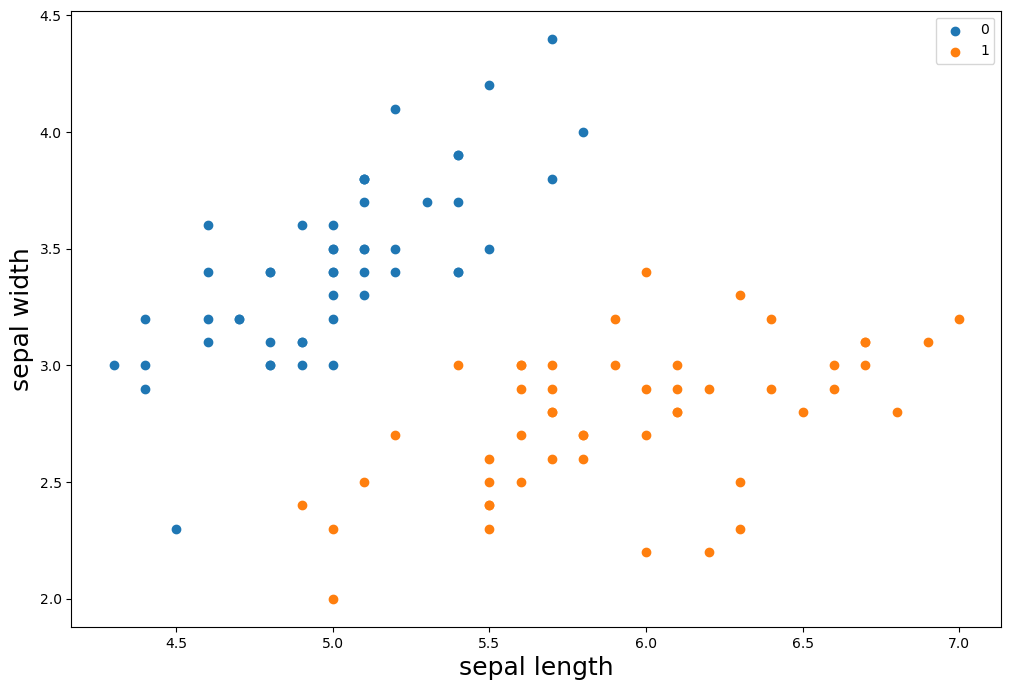

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length', fontsize=18)
plt.ylabel('sepal width', fontsize=18)
plt.legend()
plt.show()

### Numpy实现

In [14]:
class KNN:

    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train

    # 对给定的输入数据进行预测
    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            # 计算输入数据和训练样本之间的距离
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            # 将距离和对应的训练样本标签添加到knn_list中
            knn_list.append((dist, self.y_train[i]))

        # 对于训练集中不在前n个最近邻中的样本，找到距离最近的前n个邻居中出现次数最多的类别
        for i in range(self.n, len(self.X_train)):
            # 找到距离最大的点的索引
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            # 计算输入数据和训练样本之间的距离
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            # 如果当前样本的距离比最大距离小，则替换最大距离的样本
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])

        # 统计每个类别的出现次数
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        # 找到出现次数最多的类别
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count

    def score(self, X_test, y_test):
        right_count = 0  # 初始化正确预测的数量为0
        n = 10  # 设置每个样本最多考虑的最近邻居数量为10
        for X, y in zip(X_test, y_test):  # 对于测试集中的每一个样本和标签
            label = self.predict(X)  # 使用模型进行预测
            if label == y:  # 如果预测结果与真实标签相同
                right_count += 1  # 则正确预测的数量加1
        return right_count / len(X_test)  # 返回模型在测试集上的准确率

In [15]:
data = np.array(df.iloc[:150, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
clf = KNN(X_train, y_train)

In [17]:
clf.score(X_test, y_test)

0.6666666666666666

In [18]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


### Scikit-learn实例
#### sklearn.neighbors.KNeighborsClassifier

- n_neighbors: 临近点个数，即k的个数，默认是5
- p: 距离度量，默认
- algorithm: 近邻算法，可选{'auto', 'ball_tree', 'kd_tree', 'brute'}
- weights: 确定近邻的权重

- n_neighbors ： int，optional(default = 5)
默认情况下kneighbors查询使用的邻居数。就是k-NN的k的值，选取最近的k个点。

- weights ： str或callable，可选(默认=‘uniform’)
默认是uniform，参数可以是uniform、distance，也可以是用户自己定义的函数。uniform是均等的权重，就说所有的邻近点的权重都是相等的。distance是不均等的权重，距离近的点比距离远的点的影响大。用户自定义的函数，接收距离的数组，返回一组维数相同的权重。
- algorithm ： {‘auto’，‘ball_tree’，‘kd_tree’，‘brute’}，可选
快速k近邻搜索算法，默认参数为auto，可以理解为算法自己决定合适的搜索算法。除此之外，用户也可以自己指定搜索算法ball_tree、kd_tree、brute方法进行搜索，brute是蛮力搜索，也就是线性扫描，当训练集很大时，计算非常耗时。kd_tree，构造kd树存储数据以便对其进行快速检索的树形数据结构，kd树也就是数据结构中的二叉树。以中值切分构造的树，每个结点是一个超矩形，在维数小于20时效率高。ball tree是为了克服kd树高纬失效而发明的，其构造过程是以质心C和半径r分割样本空间，每个节点是一个超球体。

- leaf_size ： int，optional(默认值= 30)
默认是30，这个是构造的kd树和ball树的大小。这个值的设置会影响树构建的速度和搜索速度，同样也影响着存储树所需的内存大小。需要根据问题的性质选择最优的大小。

- p ： 整数，可选(默认= 2)
距离度量公式。在上小结，我们使用欧氏距离公式进行距离度量。除此之外，还有其他的度量方法，例如曼哈顿距离。这个参数默认为2，也就是默认使用欧式距离公式进行距离度量。也可以设置为1，使用曼哈顿距离公式进行距离度量。

- metric ： 字符串或可调用，默认为’minkowski’
用于距离度量，默认度量是minkowski，也就是p=2的欧氏距离(欧几里德度量)。

- metric_params ： dict，optional(默认=None)
距离公式的其他关键参数，这个可以不管，使用默认的None即可。

- n_jobs ： int或None，可选(默认=None)
并行处理设置。默认为1，临近点搜索并行工作数。如果为-1，那么CPU的所有cores都用于并行工作。

In [19]:
from sklearn.neighbors import KNeighborsClassifier

不同k(n_neighbors)值下的结果：

In [20]:
clf_sk = KNeighborsClassifier(n_neighbors=3)
clf_sk.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
clf_sk.score(X_test, y_test)

0.6888888888888889

In [22]:
clf_sk = KNeighborsClassifier(n_neighbors=4)
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

0.7333333333333333

In [23]:
clf_sk = KNeighborsClassifier(n_neighbors=5)
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

0.7333333333333333

自动调参吧，试试循环，找到最优的k值

In [24]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 6
best_score = 0.7555555555555555


## KD树的划分和搜索

### KD树

KD树(K-Dimension Tree)，，也可称之为$k$维树，可以用更高的效率来对空间进行划分，并且其结构非常适合寻找最近邻居和碰撞检测。KD树是一种便于对$k$维空间中的数据进行快速检索的数据结构。KD树是二叉树，表示对$k$维空间的一个划分，其每个结点对应于$k$维空间划分中的一个超矩形区域。利用KD树可以省去对大部分数据点的搜索，从而减少搜索的计算量。

KD树是二叉树，表示对𝑘维空间的一个划分(partition)。构造KD树相当于不断地用垂直于坐标轴的超平面将𝑘维空间切分，构成一系列的$k$维超矩形区域。KD树的每个结点对应于一个$k$维超矩形区域。

### 构造KD树的方法

构造根结点，使根结点对应于$k$维空间中包含所有实例点的超矩形区域；

通过下面的递归方法，不断地对$k$维空间进行切分，生成子结点。

在超矩形区域(结点)上选择一个坐标轴和在此坐标轴上的一个切分点，确定一个超平面，这个超平面通过选定的切分点并垂直于选定的坐标轴，将当前超矩形区域切分为左右两个子区域(子结点)；

这时，实例被分到两个子区域。这个过程直到子区域内没有实例时终止(终止时的结点为叶结点)。

在此过程中，将实例保存在相应的结点上。

通常，依次选择坐标轴对空间切分，选择训练实例点在选定坐标轴上的中位数(median)为切分点，这样得到的KD树是平衡的。

注意，平衡的KD树搜索时的效率未必是最优的。

对于构建过程，有两个优化点：

1. 选择切分维度

根据数据点在各维度上的分布情况，方差越大，分布越分散从方差大的维度开始切分，有较好的切分效果和平衡性。

2. 确定中值点

预先对原始数据点在所有维度进行一次排序，存储下来，然后在后续的中值选择中，无须每次都对其子集进行排序，提升了性能。也可以从原始数据点中随机选择固定数目的点，然后对其进行排序，每次从这些样本点中取中值，来作为分割超平面。该方式在实践中被证明可以取得很好性能及很好的平衡性。

In [25]:
from collections import namedtuple
from pprint import pformat

class Node(namedtuple('Node', 'location left_child right_child')):
    def __repr__(self):
        return pformat(tuple(self))

In [26]:
# kd-tree每个结点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree


class KdTreeCreate(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(split, data_set):  # 按第split维划分数据集exset创建KdNode
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            #data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  # //为Python中的整数除法
            median = data_set[split_pos]  # 中位数分割点
            split_next = (split + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点

# KDTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [27]:
# 对构建好的kd树进行搜索，寻找与目标点最近的样本点：
from math import sqrt
from collections import namedtuple

# 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")


def find_nearest(tree, point):
    k = len(point)  # 数据维度

    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"),
                          0)  # python中用float("inf")和float("-inf")表示正负无穷

        nodes_visited = 1

        s = kd_node.split  # 进行分割的维度
        pivot = kd_node.dom_elt  # 进行分割的“轴”

        if target[s] <= pivot[s]:  # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left  # 下一个访问节点为左子树根节点
            further_node = kd_node.right  # 同时记录下右子树
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_dist)  # 进行遍历找到包含目标点的区域

        nearest = temp1.nearest_point  # 以此叶结点作为“当前最近点”
        dist = temp1.nearest_dist  # 更新最近距离

        nodes_visited += temp1.nodes_visited

        if dist < max_dist:
            max_dist = dist  # 最近点将在以目标点为球心，max_dist为半径的超球体内

        temp_dist = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_dist < temp_dist:  # 判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited)  # 不相交则可以直接返回，不用继续判断

        #----------------------------------------------------------------------
        # 计算目标点与分割点的欧氏距离
        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))

        if temp_dist < dist:  # 如果“更近”
            nearest = pivot  # 更新最近点
            dist = temp_dist  # 更新最近距离
            max_dist = dist  # 更新超球体半径

        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:  # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point  # 更新最近点
            dist = temp2.nearest_dist  # 更新最近距离

        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float("inf"))  # 从根节点开始递归

In [28]:
from time import process_time
from random import random


# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]


# 产生n个k维随机向量
def random_points(k, n):
    return [random_point(k) for _ in range(n)]

In [29]:
N = 400000
t0 = process_time()
kd2 = KdTreeCreate(random_points(3, N))  # 构建包含四十万个3维空间样本点的kd树
ret2 = find_nearest(kd2, [0.1, 0.5, 0.8])  # 四十万个样本点中寻找离目标最近的点
t1 = process_time()
print("time: ", t1 - t0, "s")
print(ret2)

time:  2.40625 s
Result_tuple(nearest_point=[0.10905046408335328, 0.5074111659452999, 0.7992588995434785], nearest_dist=0.011721156541890263, nodes_visited=53)


### KD树的绘图代码

In [30]:
from operator import itemgetter

def kdtree(point_list, depth=0):
    if len(point_list) == 0:
        return None
    
    # 选择“基于深度的轴”，以便轴在所有有效值之间循环
    # 只支持二维
    axis = depth % 2

    # Sort point list and choose median as pivot element
    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2  # 选择中值点
    
    # 创建节点并构造子树
    return Node(
        location = point_list[median],
        left_child = kdtree(point_list[:median], depth + 1),
        right_child = kdtree(point_list[median + 1:], depth + 1)
    )

In [31]:
import matplotlib.pyplot as plt

# KD树的线宽
line_width = [4., 3.5, 3., 2.5, 2., 1.5, 1., .5, 0.3]


def plot_tree(tree, min_x, max_x, min_y, max_y, prev_node, branch, depth=0):
    """ plot K-D tree
    :param tree      input tree to be plotted
    :param min_x
    :param max_x
    :param min_y
    :param max_y
    :param prev_node parent's node
    :param branch    True if left, False if right
    :param depth     tree's depth
    :return tree     node
    """

    cur_node = tree.location  # 当前树节点
    left_branch = tree.left_child  # 左分支
    right_branch = tree.right_child  # 右分支

    #根据树的深度设置线条的宽度
    if depth > len(line_width) - 1:
        ln_width = line_width[len(line_width) - 1]
    else:
        ln_width = line_width[depth]

    k = len(cur_node)
    axis = depth % k

    # 画垂直分割线
    if axis == 0:
        if branch is not None and prev_node is not None:
            if branch:
                max_y = prev_node[1]
            else:
                min_y = prev_node[1]

        plt.plot([cur_node[0], cur_node[0]], [min_y, max_y],
                 linestyle='-',
                 color='red',
                 linewidth=ln_width)

    # 画水平分割线
    elif axis == 1:
        if branch is not None and prev_node is not None:
            if branch:
                max_x = prev_node[0]
            else:
                min_x = prev_node[0]

        plt.plot([min_x, max_x], [cur_node[1], cur_node[1]],
                 linestyle='-',
                 color='blue',
                 linewidth=ln_width)

    # 画当前节点
    plt.plot(cur_node[0], cur_node[1], 'ko')

    # 绘制当前节点的左分支和右分支
    if left_branch is not None:
        plot_tree(left_branch, min_x, max_x, min_y, max_y, cur_node, True,
                  depth + 1)

    if right_branch is not None:
        plot_tree(right_branch, min_x, max_x, min_y, max_y, cur_node, False,
                  depth + 1)

In [32]:
def create_diagram(tree, width, height, min_val, max_val, delta):
    plt.figure("Kd Tree", figsize=(width, height))
    plt.axis(
        [min_val - delta, max_val + delta, min_val - delta, max_val + delta])

    plt.grid(b=True, which='major', color='0.75', linestyle='--')
    plt.xticks([i for i in range(min_val - delta, max_val + delta, 1)])
    plt.yticks([i for i in range(min_val - delta, max_val + delta, 1)])

    # 画出树
    plot_tree(tree, min_val - delta, max_val + delta, min_val - delta,
              max_val + delta, None, None)
    plt.title('KD Tree')

In [33]:
def label_nodes(node, i):
    loc = node.location

    plt.text(loc[0] + 0.15, loc[1] + 0.15, str(i), fontsize=10)

    if node.left_child:
        i = label_nodes(node.left_child, i + 1)

    if node.right_child:
        i = label_nodes(node.right_child, i + 1)

    return i

In [34]:
def draw_target(point, radius):
    plt.plot(point[0], point[1], marker='o', color='#ff007f')
    circle = plt.Circle(point,
                        0.3,
                        facecolor='#ff007f',
                        edgecolor='#ff007f',
                        alpha=0.5)
    plt.gca().add_patch(circle)

    # 围绕目标点绘制超球体
    circle = plt.Circle(point,
                        radius,
                        facecolor='#ffd83d',
                        edgecolor='#ffd83d',
                        alpha=0.5)
    plt.gca().add_patch(circle)

In [35]:
def draw_neighbors(point_list):
    for point in point_list:
        # 画出找到的最近的邻居
        plt.plot(point[0], point[1], 'go')
        circle = plt.Circle(point,
                            0.3,
                            facecolor='#33cc00',
                            edgecolor='#33cc00',
                            alpha=0.5)
        plt.gca().add_patch(circle)

In [36]:
from graphviz import Digraph


def add_node(dot, node, parent_id=None, i=0, edge_label=''):
    loc = node.location
    node_id = str(i)
    dot.node(node_id, f"{i}\n({loc[0]},{loc[1]})")
    if parent_id:
        dot.edge(parent_id, node_id, label=edge_label)
    if node.left_child:
        i = add_node(dot, node.left_child, node_id, i + 1, 'l')
    if node.right_child:
        i = add_node(dot, node.right_child, node_id, i + 1, 'r')
    return i


def create_graph(tree):
    dot = Digraph(comment='Kd-tree')
    dot.attr('node',
             fontsize='20',
             shape='circle',
             width='1',
             fixedsize='true')
    dot.attr('edge', arrowsize='0.7')
    add_node(dot, tree)
    return dot

((6, 4),
 ((4, 5), ((2, 3), None, None), ((5, 7), None, None)),
 ((9, 6), ((7, 2), None, None), None))


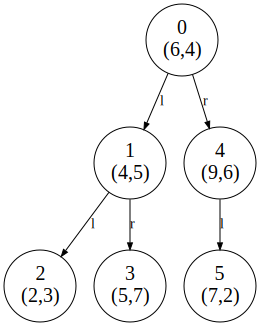

In [37]:
# point_list = [[2,3],[5,7],[9,6],[4,5],[6,4],[7,2]]
point_list1 = [(2,3),(5,7),(9,6),(4,5),(6,4),(7,2)]
tree = kdtree(point_list1)
print(tree)
create_graph(tree)

In [38]:
max_int = 10000000
min_int = -max_int - 1
max_float = float('inf')

In [39]:
def get_val_range(point_list):
    min_val = max_int
    max_val = -max_int - 1
    for point in point_list:
        min_v = min(point)
        if min_v < min_val:
            min_val = min_v
        max_v = max(point)
        if max_v > max_val:
            max_val = max_v
    return (min_val, max_val)

In [40]:
min_val, max_val=get_val_range(point_list1)

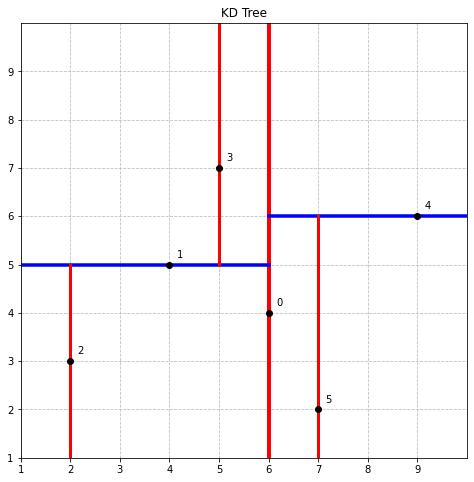

In [41]:
create_diagram(tree, 8., 8., min_val, max_val, 1)
label_nodes(tree, 0)
plt.show()

## 参考
[1] Andrew Ng. Machine Learning[EB/OL]. StanfordUniversity,2014.https://www.coursera.org/course/ml

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社,2019.